In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import random
%matplotlib inline

## Probality Theory
> Генеральная совокупность — вся изучаемая выборочным методом статистическая совокупность объектов и/или явлений общественной жизни (единиц отбора), имеющих общие качественные признаки или количественные переменные. Выборочная совокупность (выборка) — представительная часть генеральной совокупности.

> Дополнение события - это событие, которое не произойдет. Вероятность того, что событие A не произойдет, обозначается P(A'). Вероятность того, что события A и B произойдут одновременно, - это вероятность пересечения A и B. Вероятность пересечения событий A и B обозначается P(A ∩ B).

> Intersection	P(A ∩ B)
Probability of A and B
Union	P (A∪B)
Probability of A or B


### Матожидание 
![Формула матожидание]('https://cdn.uznaychtotakoe.ru/images/m-x-p-xi-xi-correcta-cke.jpg')
> m = ∑xipi - наиболее ожидаемое значение вероятности

In [234]:
# First variant to solve - Сумма попарных *
quanily = [2, 12, 3]
costs = [12.5, .5, 1.75]

partial_cost = []
for q, c in zip(quanily, costs):
    partial_cost.append(q * c)

print(sum(partial_cost))

36.25


In [236]:
# Second variant to solve
quanily = [2, 12, 3]
costs = [12.5, .5, 1.75]

partial_cost = [q * c for q, c in zip(quanily, costs)]

print(sum(partial_cost))

36.25


In [237]:
# Third variant 
quanily = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])

np.sum(quanily * costs)

36.25

In [243]:
# Взвесить каждый элемент 
values = np.array([10.0, 20.0, 30.0])
weights = np.full_like(values, 1/3)
val1 = np.array([10.0, 20.0, 30.0, 15.0, 16.0])

weights2 = np.full_like(val1, 1/5)
weights2

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [270]:
# Simple game
payoff = np.array([1.0, -.5]) 
probs = np.array([.49, .51])
np.dot(payoff, probs) # матожидание 

0.235

In [272]:
def is_even(value:float):
    return value % 2 == 0

winnings = 0.0
for t in range(1000000):
    die_toss = np.random.randint(1,7)
    winnings += 1.0 if is_even(die_toss) else -.5
    
winnings

249115.0

In [274]:
# Сумма квадратов 
values1 = np.array([-5, -3, -2,10])
squares = values1 * values1
print(squares, sum(squares))

[25  9  4  1] 39


In [275]:
# Ошибка и пример 
errors = np.array([5, -5, 3.2, -1.1])
error_df = pd.DataFrame({'errors': errors,'squared':errors * errors})
error_df

,errors,squared
0,5.0,25.00
1,-5.0,25.00
2,3.2,10.24
3,-1.1,1.21


### Моделирование Монте-Карло
> Монте-Карло – это группа математических методов, которые используют генератор случайных чисел и применяют для моделирования процессов с неопределенностью. 
> Они эффективны для расчета бизнес-рисков и прогнозирования неблагоприятных событий, например перерасхода средств или отставания от графика.

> Метод был разработан американскими учеными Станиславом Уламом и Джоном фон Нейманом во время их секретной работы в рамках Манхэттенского проекта по созданию ядерного оружия в 1940-х годах. 
> Само название «Монте-Карло» появилось из-за необходимости присвоить методу кодовое слово. Хотя метод имеет отношение к случайным величинам, назвали его так не случайно.

> Коллега Улама, Николас Метрополис, предложил назвать разработанный метод в честь широко известного района княжества Монако. Существует предположение, что его вдохновила история о дяде Улама, который на деньги родственников играл в казино Монте-Карло. Название прижилось, а метод получил широкое распространение.
> Сегодня Монте-Карло используется в моделировании и помогает более эффективно принимать решения и строить точные долгосрочные прогнозы.

### Flipping Coin 
> Метод Монте-Карло: В общем случае это получение случайных значений из эксперимента. Другими словами, повторение одних и тех же процедур снова и снова и вычисление их вероятности.
> В этом учебнике мы начнем с подбрасывания монеты, поскольку в справедливом случае есть два случая (голова и решка), где каждый имеет 50% процент.


В дальнейшем для получения количества голов и хвостов по отдельности мы вычислили. Для этого мы можем использовать простую функцию суммирования матрицы, которая даст количество единиц в эксперименте. Затем просто вычтем эти единицы, чтобы получить нули, следующим образом,

In [2]:
def coint_flip():
    return random.randint(0, 1)

result_l = []

def monte_carlo(n):
    plt.subplots(figsize = (12,9))
    result = 0
    
    for i in range(n):
        flip_result = coint_flip()
        result = result +  flip_result
        
        prob_var = result / (i + 1)
        
        result_l.append(prob_var)
        
    plt.axhline(y = 0.5, color = 'r', linestyle = '-')
    plt.xlabel('Iterations')
    plt.ylabel('Probability')
    plt.plot(result_l)
    return result / n

Find value:  0.50354


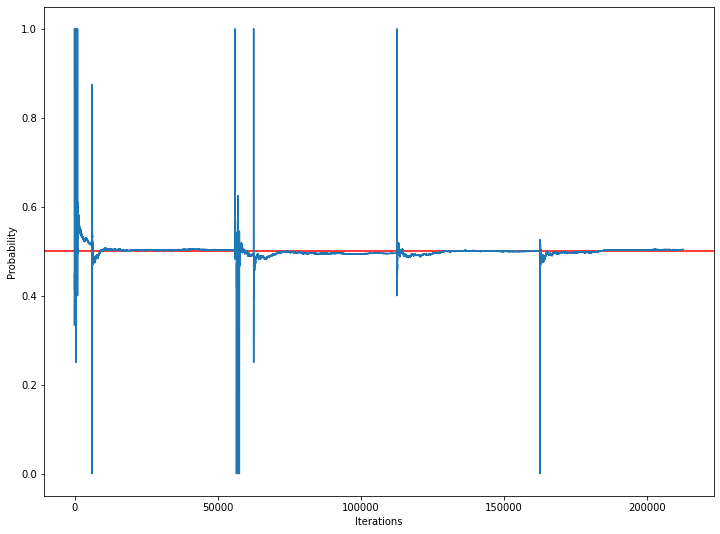

In [14]:
answear = monte_carlo(50000)
print('Find value: ',answear)

## Попадание в круг


In [7]:
m = input('Enter integer value: ')
n = 0 # попаданий в точку 
import math 
import random 
for i in range(int(m)):
    x = random.random()
    y = random.random()
    print(x, y)
    if math.sqrt(x ** 2 + y ** 2) < 1:
        n += 1

pi = 4 * n / int(m)
print(pi)


Enter integer value: 15
0.12124810260504548 0.11020548600757685
0.2175737721388945 0.8980676354071242
0.13422338066356365 0.411839062552808
0.14089880315184855 0.5402867861583891
0.8425179337683998 0.5756297417600695
0.7904516809411554 0.7411054112534834
0.7469705958614782 0.14981653323681632
0.9440927431026952 0.2986626655904475
0.6029704695666995 0.022347058121772734
0.4182378356300972 0.9328015070125137
0.7087645821115391 0.70669097661346
0.5722434922153904 0.35920365796551457
0.2352402206930605 0.42408173124285653
0.9765072386615192 0.6176559769291481
0.7988725320276292 0.667457163304727
2.4


## Проблема Монти Холла
> Парадокс впервые был сформулирован американским математиком Стивом Селвином ещё в 1975 году, но широкую известность он приобрёл благодаря популярному игровому шоу «Давайте заключим сделку». В честь ведущего этой телевикторины, которого звали Монти Холл, парадокс и получил своё название.
В чём же суть парадокса Монти Холла?

> Представьте, что перед вами три двери, как показано на рисунке ниже. За двумя дверьми находятся козы, за одной — автомобиль. Надо угадать дверь с автомобилем, и он ваш.

### Выгодно ли менять дверь ?
![Выбор двери](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/640px-Monty_open_door.svg.png)

> 1/3 - car 1/3 - goat 1/3 - goat

## Выбрали одну дверь и получили результатм с 1/3 до 2/3
![Выбор после открытие одной двери](https://miro.medium.com/max/1400/0*2VPhlzymLpGTrzG3.png)

Winning prob if you always switch:  0.688
Winning prob if you stay original choise:  0.312


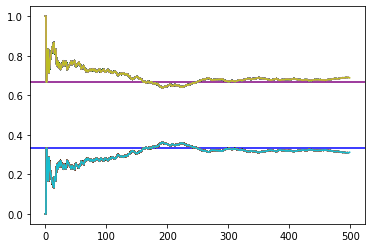

In [16]:
doors = ['goat', 'goat', 'car']

switch_win_prob = []
stick_win_prob = []

plt.axhline(y = 0.6666, color = 'purple', linestyle = '-')
plt.axhline(y = 0.3333, color = 'b', linestyle = '-')

def monte_carlo(n):
    
    switch_wins = 0
    stick_wins = 0
    
    for i in range(n):
        
        random.shuffle(doors)
        
        k = random.randrange(2)
        
        if doors[k] != 'car':
            switch_wins += 1
        else:
            stick_wins += 1
        
        switch_win_prob.append(switch_wins / (i + 1))
        stick_win_prob.append(stick_wins / (i + 1))
        
        plt.plot(switch_win_prob)
        plt.plot(stick_win_prob)
        
    print('Winning prob if you always switch: ',switch_win_prob[-1])
    print('Winning prob if you stay original choise: ',stick_win_prob[-1])
        
monte_carlo(500)

### Rules 
    1. В мешочке лежат карточки с числами от 1 до 100
    2. Пользователь делает ставку четное или нечетное
    3. 10, 11 - спец числа где 10 - нечет, 11 - чет
    4. Если вы ставите на четное число и получаете 10, вы проигрываете
    5. Если вы ставите на нечетное число и получаете 11, вы проигрываете

Even or Odd: Even
All tries:  [-14000, 20000, 10000, 4000, 24000, 26000, 24000, 12000, 14000, 16000]


NameError: name 'squares' is not defined

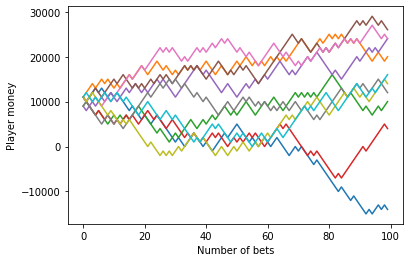

In [15]:
choice = input('Even or Odd: ')
if choice == 'Even':
    def pick_note():
        
        note = random.randint(1, 100)
        
        # проверяем условие игры
        if note % 2 != 0 or note == 10:
            return False 
        elif note % 2 == 0:
            return True

elif choice == 'Odd':
    def pick_note():
        
        note = random.randint(1, 100)
        
        # проверяем условие игры
        if note % 2 == 0 or note == 11:
            return False
        elif note % 2 == 1:
            return True
         
# Функция главной игры
def play(total_money, bet_money, total_plays):
    
    num_of_plays = []
    money = []
    
    play = 1
    
    for play in range(total_plays):
        if pick_note():
            
            total_money = total_money + bet_money
            num_of_plays.append(play)
            money.append(total_money)
        
        else:
            total_money = total_money - bet_money
            
            num_of_plays.append(play)
            
            money.append(total_money)
        
    plt.ylabel('Player money')
    plt.xlabel('Number of bets')
    plt.plot(num_of_plays, money)
    
    final_funds.append(money[-1])
    return final_funds

final_funds = []

start_capital = 10000
bet_strategy = 1000

number_of_tries = 10 # дней когда ходили попыток


number_of_games_attended_each_try = 100 # количество игр

for i in range(number_of_tries):
    end_fund = play(start_capital, bet_strategy
                    , number_of_games_attended_each_try)
    
print('All tries: ', end_fund)
print(f'Player start with {start_capital} each time {squares * number_of_tries}')

print('Total capital after all ties: ', sum(end_fund))

#print('Capital change in percent:', sum(end_fund) / len(end_fund) - start_capital) * 100

In [42]:
even = []
odd = []

for i in range(1, 1001):
    if i % 2 == 0:
        even.append(i)
    elif i % 2 == 1:
        odd.append(i)
        
sum_even = sum(even)
sum_odd = sum(odd)
print(len(even), len(odd))

500 500


### Slide 15
> X1and X2are random variables of the results of rolling 2 fair dice. 
> Use a numpy simulation to show the distribution of the sum of the dice, i.e. X1+ X2.

In [50]:
quanily = np.array([2, 12, 3])
costs = np.array([12.5, .5, 1.75])

np.sum(quanily * costs)

36.25

### Slide 16 
> X1and X2are random variables of the results of rolling 2 fair dice. 
> Use a numpy simulation to show the distribution of the sum of the dice, i.e. X1+ X2.

### Slide 18
> X1, X2and X3are random variables of the results of rolling 3 fair dice.
> Use a numpy simulation to show the distribution of:
 1. P(X1+ X2+ X3)
 2. P(X1+ X2+ X3| X3= 4)
 3. P(X1+ X2+ X3| X1+ X2= 4)
 4. Explain the results.

### Slide 27
> Design and implement a Monte Carlo experiment to estimate the value of pi.

In [4]:
from scipy.stats import bernoulli

C:\Users\Gennadiy\miniconda3\envs\py1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


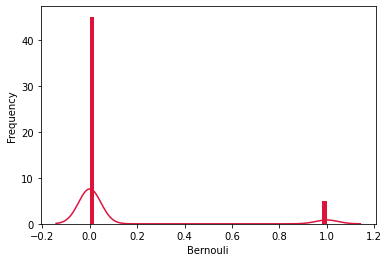

In [7]:

data_bern = bernoulli.rvs(size=10000, p=0.1)

ax = sns.distplot(data_bern,
                  kde=True,
                  color='crimson',
                  hist_kws={"linewidth": 25,'alpha':1})

ax.set(xlabel='Bernouli', ylabel='Frequency');

In [12]:
r = stats.bernoulli.rvs(p = 0.9, size = 1000)
r[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

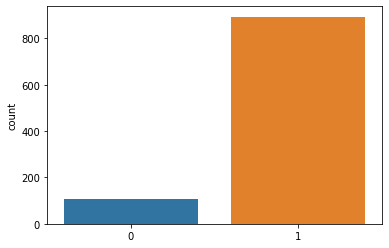

In [13]:
sns.countplot(x = r);

In [19]:
n, p = 10, 0.3

sample = stats.binom(n = n, p = p).rvs(size = 200)

mean, var, skew, kurt = stats.binom.stats(n, p, moments = 'mvsk')

# var - дисперсия
# skew - коэфициент ассиметрии 
# kurt коэффицие́нт эксце́сса


print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среднее: %.3f' % sample.mean())
print('Выборочное среднее: %.3f' % sample.var())
print(mean, var, skew, kurt)

Первые 10 значений выборки:
 [3 5 3 2 1 3 2 1 3 2]
Выборочное среднее: 3.100
Выборочное среднее: 2.230
3.0 2.0999999999999996 0.27602622373694174 -0.12380952380952373


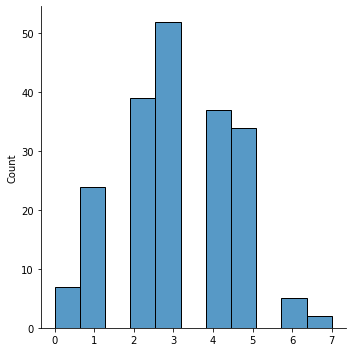

In [20]:
sns.displot(data = sample);

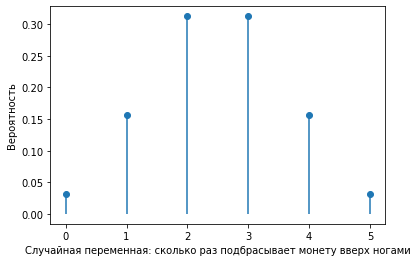

In [21]:
# Шаг 1, определите случайную величину: 5 раз подбрасываете монету, сколько раз лицом вверх
n2 = 5 # Количество раз что-то сделать
p2 = 0.5 # Вероятность успеха при выполнении чего-либо (вероятность перевернуть монетку вверх дном)
X2 = np.arange (0, n2 + 1,1) # Количество раз, чтобы преуспеть в чем-то (количество раз подбрасывая монетку вверх ногами)


 # Шаг 2, найти вероятность соответствующего распределения: функция качества вероятности (PMF)
 # Возвращаем список, каждый элемент в списке представляет вероятность соответствующего значения в случайной переменной
pList2 = stats.binom.pmf(X2,n2,p2)


'''
 Шаг 3, рисование
 График рисует полилинии по умолчанию
 маркер: форма точки, значение o указывает, что точка является маркером круга (круговой маркер)
 linestyle: форма линии, значение None означает, что ломаная, соединяющая точки, не отображается
'''
plt.plot(X2,pList2,marker='o',linestyle='None')
'''
 vlines используется для рисования вертикальных линий,
 Описание параметра: vline (значение координаты x, минимальное значение координаты y, максимальное значение координаты y)
 X, который мы передаем, является массивом, который рисует вертикальную линию для каждого значения координаты x в массиве,
 Минимальное значение координаты y вертикальной линии равно 0, а максимальное значение координаты y соответствует значению в pList2
'''
plt.vlines(X2,0,pList2)
plt.xlabel('Случайная переменная: сколько раз подбрасывает монету вверх ногами')
plt.ylabel('Вероятность')
plt.show()

In [24]:
df=pd.read_csv('c:/Users/Gennadiy/PycharmProjects/py1/data.csv')

In [25]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [27]:
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1922,2014-06-04 00:00:00,648000.0,4.0,2.50,3290,6203,2.0,0,0,3,3290,0,2008,0,36011 SE Kendall Peak St,Snoqualmie,WA 98065,USA
1625,2014-05-30 00:00:00,315000.0,3.0,2.00,1060,5750,1.0,0,0,3,1060,0,1981,2013,5452 31st Ave SW,Seattle,WA 98126,USA
893,2014-05-19 00:00:00,141800.0,2.0,1.00,930,4743,1.0,0,0,4,930,0,1942,1982,821 Dayton Ave NE,Renton,WA 98056,USA
2860,2014-06-19 00:00:00,756000.0,4.0,2.25,2160,5600,1.0,0,0,5,1080,1080,1947,0,2667 11th Ave W,Seattle,WA 98119,USA
149,2014-05-05 00:00:00,419190.0,2.0,2.50,1590,1426,2.0,0,0,3,1590,0,2014,0,1273 NE Hickory Ln,Issaquah,WA 98029,USA


In [28]:
np.round(df.describe(),1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0,4600.0
mean,551963.0,3.4,2.2,2139.3,14852.5,1.5,0.0,0.2,3.5,1827.3,312.1,1970.8,808.6
std,563834.7,0.9,0.8,963.2,35884.4,0.5,0.1,0.8,0.7,862.2,464.1,29.7,979.4
min,0.0,0.0,0.0,370.0,638.0,1.0,0.0,0.0,1.0,370.0,0.0,1900.0,0.0
25%,322875.0,3.0,1.8,1460.0,5000.8,1.0,0.0,0.0,3.0,1190.0,0.0,1951.0,0.0
50%,460943.5,3.0,2.2,1980.0,7683.0,1.5,0.0,0.0,3.0,1590.0,0.0,1976.0,0.0
75%,654962.5,4.0,2.5,2620.0,11001.2,2.0,0.0,0.0,4.0,2300.0,610.0,1997.0,1999.0
max,26590000.0,9.0,8.0,13540.0,1074218.0,3.5,1.0,4.0,5.0,9410.0,4820.0,2014.0,2014.0


In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [30]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [32]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [33]:
df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [35]:
df.shape

(4600, 18)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [38]:
dataset = df[['street','statezip','city','sqft_living','sqft_above','bathrooms','yr_built','sqft_lot','bedrooms']]
dataset

,street,statezip,city,sqft_living,sqft_above,bathrooms,yr_built,sqft_lot,bedrooms
0,18810 Densmore Ave N,WA 98133,Shoreline,1340,1340,1.50,1955,7912,3.0
1,709 W Blaine St,WA 98119,Seattle,3650,3370,2.50,1921,9050,5.0
2,26206-26214 143rd Ave SE,WA 98042,Kent,1930,1930,2.00,1966,11947,3.0
3,857 170th Pl NE,WA 98008,Bellevue,2000,1000,2.25,1963,8030,3.0
4,9105 170th Ave NE,WA 98052,Redmond,1940,1140,2.50,1976,10500,4.0
...,...,...,...,...,...,...,...,...,...
4595,501 N 143rd St,WA 98133,Seattle,1510,1510,1.75,1954,6360,3.0
4596,14855 SE 10th Pl,WA 98007,Bellevue,1460,1460,2.50,1983,7573,3.0
4597,759 Ilwaco Pl NE,WA 98059,Renton,3010,3010,2.50,2009,7014,3.0
4598,5148 S Creston St,WA 98178,Seattle,2090,1070,2.00,1974,6630,4.0


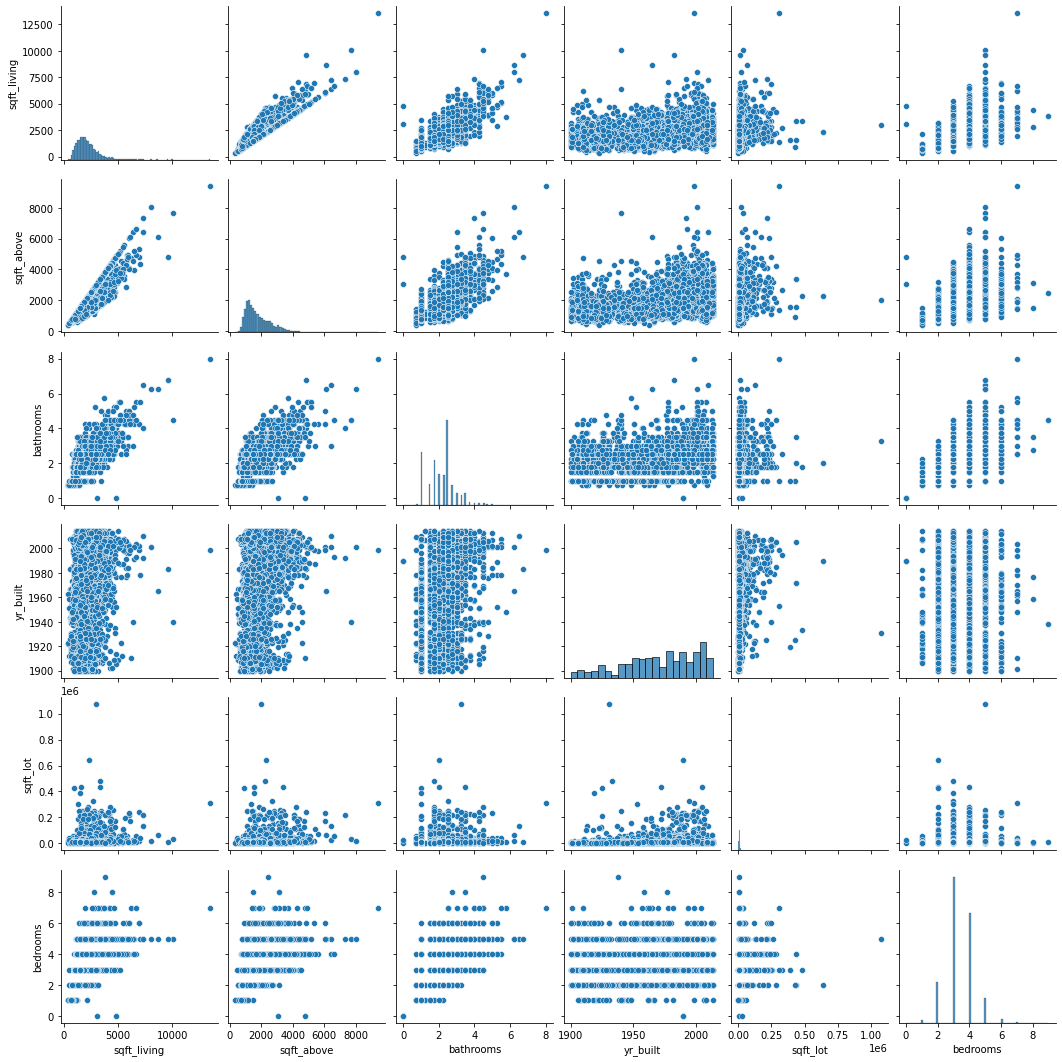

In [41]:
sns.pairplot(dataset);